<a href="https://colab.research.google.com/github/Jesse-Allister-Kasien-Elliott/learning_distributions_from_samples/blob/main/LearningDistributionsFromSamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

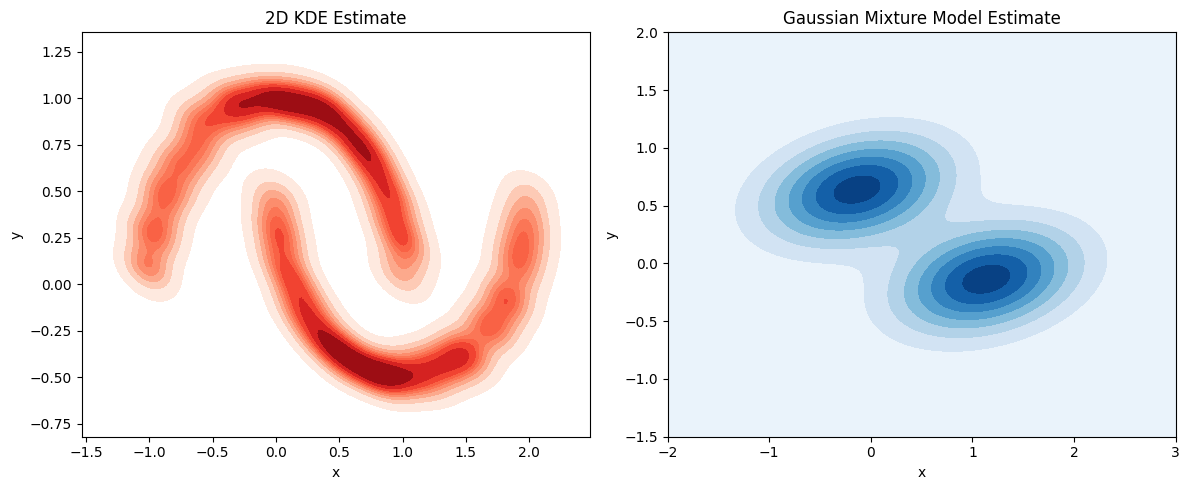

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons
import seaborn as sns

# Generate a 2D non-Gaussian dataset (e.g., two interleaved half circles)
X, _ = make_moons(n_samples=1000, noise=0.05)

# Fit KDE using seaborn for comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(x=X[:, 0], y=X[:, 1], cmap="Reds", fill=True, bw_adjust=0.5)
#sns.kdeplot(x=X[:, 0], y=X[:, 1], cmap="Reds", bw_adjust=0.5)
plt.title("2D KDE Estimate")
plt.xlabel("x")
plt.ylabel("y")

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X)

# Create a grid of points to evaluate GMM
x = np.linspace(-2, 3, 200)
y = np.linspace(-1.5, 2, 200)
xx, yy = np.meshgrid(x, y)
grid = np.column_stack([xx.ravel(), yy.ravel()])
log_probs = gmm.score_samples(grid)
probs = np.exp(log_probs).reshape(xx.shape)

# Plot GMM estimated density
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, probs, cmap="Blues")
plt.title("Gaussian Mixture Model Estimate")
plt.xlabel("x")
plt.ylabel("y")

plt.tight_layout()
plt.show()
